# Covid 19 - predictions

### Libraries

In [1]:
import pandas as pd
import pandas_profiling
import pandas as pd 
import random
import math
import time

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime as dt
from datetime import timedelta
import operator 


In [4]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 

### Preparation for predictions

In [5]:
covid_df= pd.read_csv("Corona.csv")
del covid_df["Unnamed: 0"]
covid_df.head()

,ObservationDate,Active Cases,Confirmed,Total Confirmed,Deaths,Total Deaths,Recovered,Total Recovered,Mortality Rate,Recovery Rate,Closed Cases
0,2020-01-22,14823.0,555.0,13698.0,17.0,425.0,28.0,700.0,3.063063,5.045045,1125.0
1,2020-01-23,50209.0,653.0,46535.0,18.0,1380.0,30.0,2294.0,2.756508,4.594181,3674.0
2,2020-01-24,90875.0,941.0,84580.0,26.0,2455.0,36.0,3840.0,2.763018,3.825717,6295.0
3,2020-01-25,161453.0,1438.0,151146.0,42.0,4491.0,39.0,5816.0,2.920723,2.712100,10307.0
4,2020-01-26,273936.0,2118.0,257974.0,56.0,7420.0,52.0,8542.0,2.644004,2.455146,15962.0


In [8]:
covid_df.tail()

,ObservationDate,Active Cases,Confirmed,Total Confirmed,Deaths,Total Deaths,Recovered,Total Recovered,Mortality Rate,Recovery Rate,Closed Cases
56,2020-03-18,1.602065e+09,214203.0,1.135116e+09,8726.0,37697731.0,82988.0,429252148.0,4.073706,38.742688,466949879.0
57,2020-03-19,1.744737e+09,242001.0,1.237146e+09,9860.0,41624303.0,84637.0,465966986.0,4.074363,34.973822,507591289.0
58,2020-03-20,1.896370e+09,271455.0,1.347335e+09,11292.0,45979738.0,87078.0,503055377.0,4.159805,32.078245,549035115.0
59,2020-03-21,2.051173e+09,303816.0,1.461426e+09,12965.0,50668353.0,91351.0,539078878.0,4.267386,30.067870,589747231.0
60,2020-03-22,2.222105e+09,335245.0,1.588194e+09,14626.0,55996377.0,97557.0,577914253.0,4.362779,29.100210,633910630.0


In [6]:
#Converting "Observation Date" into Datetime format
covid_df["ObservationDate"]=pd.to_datetime(covid_df["ObservationDate"])

In [7]:

new_date=[]
for i in range(1,18):
    new_date.append(covid_df["ObservationDate"].iloc[-1] + timedelta(days=i) )
model_predictions=pd.DataFrame(new_date) 
model_predictions.head()

,0
0,2020-03-23
1,2020-03-24
2,2020-03-25
3,2020-03-26
4,2020-03-27


In [8]:
new_date=[]
for i in range(1,18):
    new_date.append(covid_df["ObservationDate"].iloc[-1] + timedelta(days=i) )
model_predictions=pd.DataFrame(new_date) 
model_predictions

,0
0,2020-03-23
1,2020-03-24
2,2020-03-25
3,2020-03-26
4,2020-03-27
5,2020-03-28
6,2020-03-29
7,2020-03-30
8,2020-03-31
9,2020-04-01


#### model

In [9]:
covid_df["Days Since"]=covid_df.index-covid_df.index[0]
covid_df.index
#covid_df["Days Since"]=covid_df["Days Since"].dt.days

RangeIndex(start=0, stop=61, step=1)

In [10]:
train_ml=covid_df.iloc[:int(covid_df.shape[0]*0.90)]
valid_ml=covid_df.iloc[int(covid_df.shape[0]*0.90):]
model_scores=[]

In [11]:
# To include standard scaler
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()


In [67]:
#X_train = np.array(train_ml["Days Since"]).reshape(-1,1)
#X_test = np.array(valid_ml["Days Since"]).reshape(-1,1)
#y_train = np.array(train_ml["Confirmed"]).reshape(-1,1)
#y_test= np.array(valid_ml["Days Since"]).reshape(-1,1)
from sklearn import preprocessing
#test size of 30% and train of 70%
X=np.array(covid_df[["Days Since"]])
y=np.array(covid_df["Confirmed"])

#SCALING
#X = sc_X.fit_transform(X)
#y = sc_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    shuffle=False)


#train_test_split(x, y, test_size=0.10, shuffle=False) 

### SVM

In [68]:
# find the optimal parameters for SVR
kernel =["poly", "sigmoid", "rbf"] #if not specified rbf will be used
c = [0.01, 0.1, 1, 10, 100, 100]
gamma = ['auto','scale']
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]
degree = [3, 4, 5, 6, 7]

svm_grid = {'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking, 'degree': degree}

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)
svm_search = svm_search.fit(X_train,y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   11.2s finished


In [69]:
svm_search.best_params_

{'shrinking': True, 'gamma': 'scale', 'epsilon': 1, 'degree': 3, 'C': 100}

In [64]:
#Intializing SVR Model and with hyperparameters for GridSearchCV
svm = SVR(shrinking=True, kernel='poly',gamma='scale', epsilon=0.01, degree=7, C=100)

#Performing GridSearchCV to find the Best Estimator
#svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm=svm.fit(X_train, y_train)

In [65]:
confidence = svm.score(X_test, y_test)
print(confidence)

-77124.71999363218


In [66]:
#svm_pred = svm_confirmed.predict(future_forecast)
y_pred=svm.predict(X_test)

In [44]:
y_pred

array([114525.33297117, 120940.21363289, 127660.50843204, 134693.32002298,
       142045.75106007, 149724.90419765, 157737.88209011, 166091.78739178,
       174793.72275704, 183850.79084023, 193270.09429573, 203058.73577788,
       213223.81794105, 223772.44343959, 234711.71492787, 246048.73506024,
       257790.60649106, 269944.4318747 , 282517.3138655 ])

In [45]:
#print(len(y))

In [46]:
# check w/ testing data
mse=mean_squared_error(y_test, y_pred)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:',mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mse))

MAE: 31350.91592668792
MSE: 1111504523.9416578
RMSE 33339.234003522906


In [21]:
#covid_df.columns

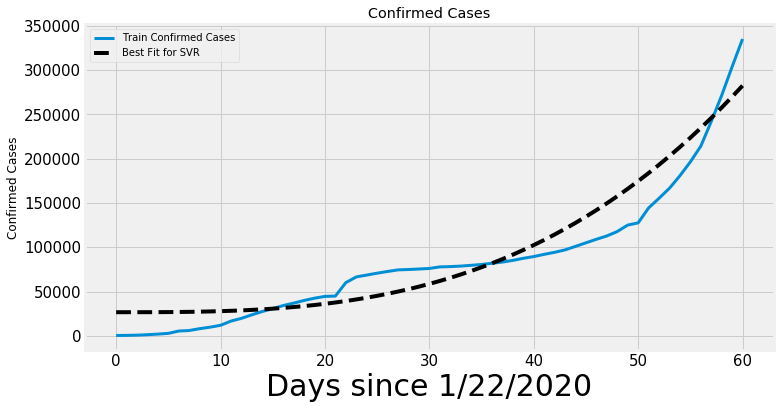

In [47]:

#svm_test_pred = svm_confirmed.predict(X_test_confirmed)
#plt.plot(y_test_confirmed)
#plt.plot(svm_test_pred)
#plt.legend(['Test Data', 'SVM Predictions'])
#print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
#print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

#plt.figure(figsize=(20,12))
#plt.plot(adjusted_dates, total_deaths)
#plt.plot(future_forecast, svm_pred, linestyle ="dashed", color="purple")
#plt.title("Number of Coronavirus Over Time", size=30)
#plt.xlabel("Dayse since 1/22/2020", size=30)
#plt.ylabel("Number of Cases", size=30)
#plt.legend(["Confirmed Cases", "SVM predictions"])
#plt.xticks(size=15)
#plt.yticks(size=15)

# nº cases of coronavirus over time
plt.figure(figsize=(11,6))
prediction_svm=svm.predict(X)

plt.plot(X, y,label= "Train Confirmed Cases",linewidth=3)
plt.plot(X, prediction_svm, linestyle='--',label="Best Fit for SVR",color='black')
plt.xlabel("Days since 1/22/2020", size=30)
plt.ylabel('Confirmed Cases')
plt.title('Confirmed Cases')
plt.xticks(size=15)
plt.yticks(size=15)
plt.legend()

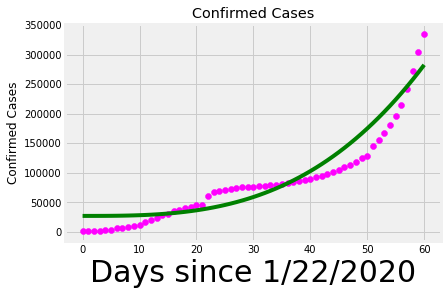

In [48]:
plt.scatter(X, y, color = 'magenta')
plt.plot(X, prediction_svm, color = 'green')
plt.title('Confirmed Cases')
plt.xlabel("Days since 1/22/2020", size=30)
plt.ylabel('Confirmed Cases')
plt.show()

In [49]:
#new_date=[]
#new_prediction_lr=[]
#new_prediction_svm=[]
#for i in range(1,18):
#    new_date.append(covid_df.index["Observation Date"]+timedelta(days=i))
#    new_prediction_lr.append(lin_reg.predict(np.array(covid_df["Days Since"].max()+i).reshape(-1,1))[0][0])
#    new_prediction_svm.append(svm.predict(np.array(covid_df["Days Since"].max()+i).reshape(-1,1))[0])

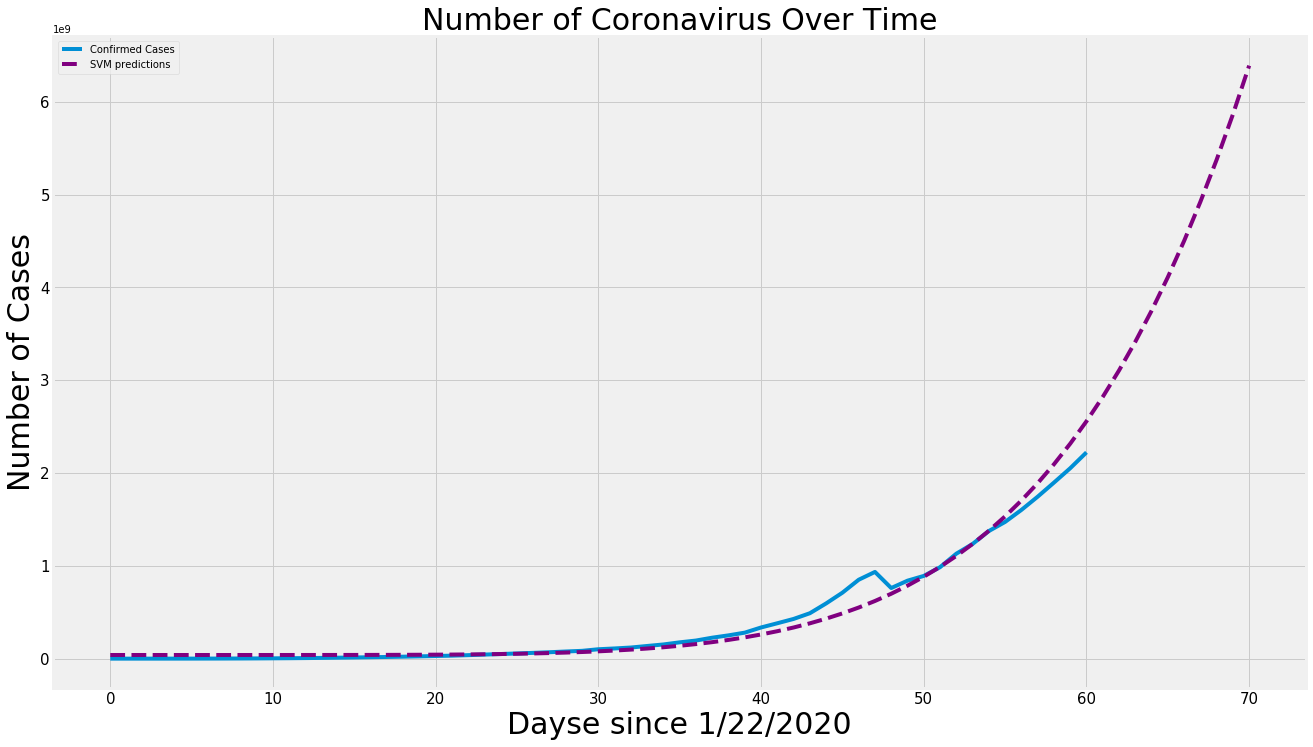

In [228]:
#pd.set_option('display.float_format', lambda x: '%.6f' % x)
#model_predictions=pd.DataFrame(zip(new_date,new_prediction_lr,new_prediction_svm),columns=["Dates","Linear Regression Prediction","SVM Prediction"])
#model_predictions.head()

In [229]:
# prediction for the future 10 days
#print("SVM future predictions: ")
#set(zip(future_forecast_dates[-10:], svm_pred[-10:]))

SVM future predictions: 


{('2020-03-23', 2819670917.294566),
 ('2020-03-24', 3104594220.2932205),
 ('2020-03-25', 3413445525.6330996),
 ('2020-03-26', 3747806118.2634664),
 ('2020-03-27', 4109334395.7670126),
 ('2020-03-28', 4499768335.601486),
 ('2020-03-29', 4920928001.195536),
 ('2020-03-30', 5374718086.898724),
 ('2020-03-31', 5863130501.785756),
 ('2020-04-01', 6388246992.314905)}

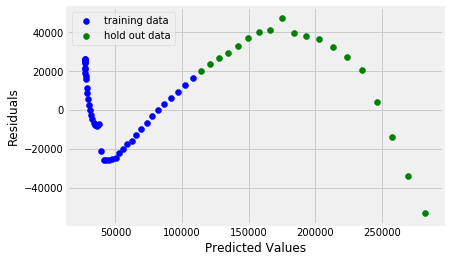

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(svm.predict(X_train), svm.predict(X_train)-y_train, c="b", label="training data")
plt.scatter(svm.predict(X_test), svm.predict(X_test)-y_test, c="g", label="hold out data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
#plt.hlines(y=0, xmin=-10, xmax=4000, color="r")
#plt.xlim([-10,50000])
plt.show()

In [54]:
from sklearn import metrics

print("MAE train: ", metrics.mean_absolute_error(y_train, svm.predict(X_train).reshape(-1,1))) 
print("MSE train: ",metrics.mean_squared_error(y_train, svm.predict(X_train).reshape(-1,1)))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, svm.predict(X_train).reshape(-1,1))))
print("r2: ",np.sqrt(metrics.r2_score(y_train, svm.predict(X_train).reshape(-1,1))))

print("MAE test: ", metrics.mean_absolute_error(y_test, svm.predict(X_test).reshape(-1,1))) 
print("MSE test: ",metrics.mean_squared_error(y_test, svm.predict(X_test).reshape(-1,1)))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, svm.predict(X_test).reshape(-1,1))))
print("r2: ",np.sqrt(metrics.r2_score(y_test, svm.predict(X_test).reshape(-1,1))))

MAE train:  14664.164009984472
MSE train:  289688039.8199848
RMSE train:  17020.224435065033
r2:  0.8478328298933218
MAE test:  31350.91592668792
MSE test:  1111504523.9416578
RMSE test:  33339.234003522906
r2:  0.8854078267088908
